In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pacpy

In [3]:
%matplotlib inline

In [2]:
x = np.linspace(-5, 5, num=1000)
y = np.sin(x)

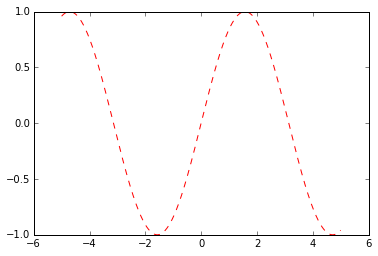

In [5]:
plt.plot(x, y, '--r')

In [6]:
eeg = np.fromfile('D10_1.fdt', dtype=np.float32)

In [7]:
eeg.shape

(3200000,)

In [10]:
eeg = eeg.reshape((64, 500, 100), order='F')

In [11]:
eeg.shape

(64, 500, 100)

In [12]:
time = np.linspace(-1000, 996, num=500)

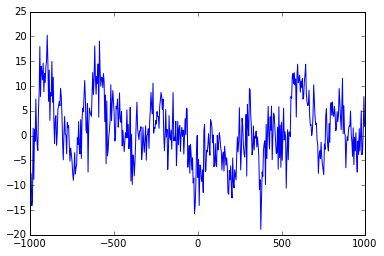

In [13]:
plt.plot(time, eeg[7, :, 5])

### Calculate PAC through regression (sin + cos)

In [25]:
sig = eeg[7, :, 5]
pac_val = pacpy.pac.glm(sig, sig, (8, 10), (30,40), fs=250, filter_kwargs={'w': 3})

In [26]:
pac_val

0.0013292722432522996

In [28]:
# comodulogram:
pac_vals = pacpy.pac.comodulogram(sig, sig, (4, 12), (20, 60), 2, 10, fs=250, pac_method='glm', filter_kwargs={'w': 3})

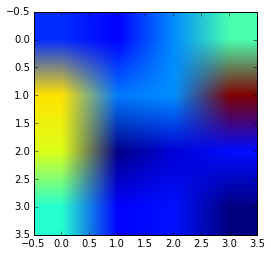

In [34]:
plt.imshow(pac_vals)
# now we would need to put it upside down and change xlabels and ylabels

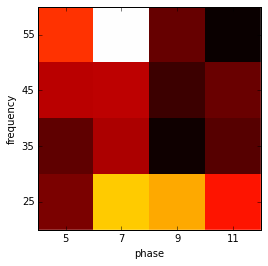

In [46]:
plt.imshow(pac_vals.transpose(), cmap='hot', interpolation='none', origin='lower')
low_frq = np.arange(5, 12, 2)
hi_frq = np.arange(25, 60, 10)
plt.xticks([0,1,2,3], low_frq)
plt.yticks([0,1,2,3], hi_frq)
plt.xlabel('phase')
plt.ylabel('frequency');

In [47]:
55/7

7.857142857142857

In [45]:
print(pac_vals[1,3])
print(pac_vals[3,3])

0.0866000729818
0.000329042121584


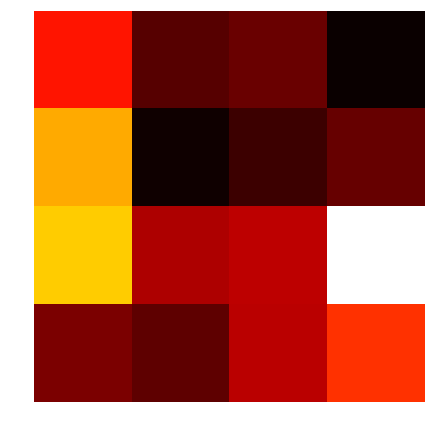

In [33]:
from showit import image
image(np.flipud(pac_vals), cmap='hot')